In [2130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import glob
import re
import datetime
from datetime import datetime
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean
from numpy import std
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from numpy import exp
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

import category_encoders as ce

from numpy import percentile

import scipy as sc
from pandas import read_csv


from sklearn.preprocessing import PowerTransformer

Funkcia, ktorá nahradí chýbajúce hodnoty v stĺpci column modusom (najviac vyskytovaný element).

In [2131]:
def get_mode(data_frame, column):
    data = data_frame[column].values.reshape(-1, 1)
    imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    data_frame[column] = imp.fit_transform(data)
    return data_frame

Funkcia, ktorá nahradí chýbajúce hodnoty v stĺpci column mediánom.

In [2132]:
def get_median(data_frame, column):
    median = data_frame[column].median()
    data_frame[column].fillna(median, inplace = True)
    return data_frame

Funkcia, ktorá nahradí chýbajúce hodnoty v stĺpci column priemerom.

In [2133]:
def get_mean(data_frame, column):
    mean = data_frame[column].mean()
    data_frame[column].fillna(mean, inplace = True)
    return data_frame

In [2134]:
 def fill_median(data_frame):
    data_frame = get_median(data_frame, "mean_glucose")
    data_frame = get_median(data_frame, "std_glucose")
    data_frame = get_median(data_frame, "kurtosis_glucose")
    data_frame = get_median(data_frame, "skewness_glucose")
    data_frame = get_median(data_frame, "mean_oxygen")
    data_frame = get_median(data_frame, "std_oxygen")
    data_frame = get_median(data_frame, "kurtosis_oxygen")
    data_frame = get_median(data_frame, "skewness_oxygen")
    
    data_frame = get_median(data_frame, "education-num")
    data_frame = get_median(data_frame, "capital-gain")
    data_frame = get_median(data_frame, "fnlwgt")
    data_frame = get_median(data_frame, "hours-per-week")
    data_frame = get_median(data_frame, "capital-loss")
    
    return data_frame

In [2135]:
 def fill_mode(data_frame):
    data_frame = get_mode(data_frame, "race")
    data_frame = get_mode(data_frame, "marital-status")
    data_frame = get_mode(data_frame, "occupation")
    data_frame = get_mode(data_frame, "pregnant")
    data_frame = get_mode(data_frame, "relationship")
    data_frame = get_mode(data_frame, "education")
    data_frame = get_mode(data_frame, "income")
    data_frame = get_mode(data_frame, "native-country")
    data_frame = get_mode(data_frame, "workclass")
    
    data_frame = get_mode(data_frame, "class")
    
    return data_frame

In [2136]:
def get_zip(data_frame, column):
    for i in range(len(data_frame[column])):
        zipcode = str(data_frame[column][i])
        data_frame.loc[i, column] = zipcode[len(zipcode) - 5:len(zipcode)]
    data_frame[column] = data_frame[column].astype('int')
    return data_frame

In [2137]:
def calculate_age(data_frame, date_of_birth, age):
    for i in range(len(data_frame[date_of_birth])):
        curr_age = int(data_frame[age][i])
        
        if curr_age < 0 or curr_age > 99:
            year = data_frame[date_of_birth][i]
            year = year[:4]            
            new_age = 2019 - int(year)
            
            if new_age < 0 or new_age > 99:
                data_frame = data_frame.drop(i)
            else:
                data_frame.loc[i, age] = str(new_age)
                
    data_frame = data_frame.reset_index()
    data_frame = data_frame.drop('index', 1)        
    return data_frame

Funkcia, ktorá zjednotí duplikáty

In [2138]:
def unify_rows(data_frame):
    aggregation_functions = {}
    for col in data_frame.columns:
        aggregation_functions[col] = "first" 

    return data_frame.groupby(data_frame['name'], as_index=False).aggregate(aggregation_functions)


# def replace_value(data_frame):
#     aggregation_functions = {'name': 'first', 'address': 'first', 'race': 'first', 'marital-status': 'first', 'occupation': 'first',
#                              'pregnant': 'first', 'education-num': 'first', 'relationship': 'first', 'capital-gain': 'first',
#                              'education': 'first', 'fnlwgt': 'first', 'class': 'first', 'income': 'first', 'medical_info': 'first',
#                             'native-country': 'first', 'hours-per-week': 'first', 'capital-loss': 'first', 'workclass': 'first'}
#     return data_frame.groupby(data_frame['name'], as_index=False).aggregate(aggregation_functions)


In [2139]:
def cleanse_some_values(data_frame, column, change_from, change_to):
    for i in range(len(change_from)):
        data_frame.loc[data_frame[column] == change_from[i], column] = change_to

In [2140]:
# def unify_values(data_frame):
#     unify_ppl = Pipeline([
#                     ('1. step',  cleanse_some_values(data_frame, 'pregnant', ["F", "FALSE", "f"], 0)),
#                     ('2. step', cleanse_some_values(data_frame, 'pregnant', ["T", "TRUE", "t"], 1)),

#                     ('3. step', cleanse_some_values(data_frame, 'marital-status', [" Widowed", " Never-married", " Divorced"], 0)),
#                     ('4. step',cleanse_some_values(data_frame, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], 1)),

#                     ('5. step', cleanse_some_values(data_frame, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], 0)),
#                     ('6. step', cleanse_some_values(data_frame, 'education', [" Bachelors", " Masters", " Doctorate"], 1)),
#                     ('7. step', cleanse_some_values(data_frame, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], 2)),
#                     ('8. step', cleanse_some_values(data_frame, 'education', [" Preschool"], 3)),

#                     ('9. step', cleanse_some_values(data_frame, 'workclass', [" Private"], "private")),
#                     ('10. step', cleanse_some_values(data_frame, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")),
#                     ('11. step', cleanse_some_values(data_frame, 'workclass', [" Never-worked", " Without-pay"], "not-working")),
#                     ('12. step', cleanse_some_values(data_frame, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")),
#                     ('13. step', cleanse_some_values(data_frame, 'workclass', [" ?", "?"], np.nan)),
                    
# #                     ('14. step', cleanse_some_values(data_frame, 'sex', [" Female"], 0)),
# #                     ('15. step', cleanse_some_values(data_frame, 'sex', [" Male"], 1)),
        
# #                     ('16. step', cleanse_some_values(data_frame, 'race', [" White"], 0)),
# #                     ('17. step', cleanse_some_values(data_frame, 'race', [" Asian-Pac-Islander"], 1)),
# #                     ('18. step', cleanse_some_values(data_frame, 'race', [" Black"], 2)),
# #                     ('19. step', cleanse_some_values(data_frame, 'race', [" Other"], 3)),
# #                     ('20. step', cleanse_some_values(data_frame, 'race', [" Amer-Indian-Eskimo"], 4)),
# #                     ('21. step', cleanse_some_values(data_frame, 'race', ["??"], np.nan)),
        
# #                     ('22. step', cleanse_some_values(data_frame, 'relationship', [" Own-child"], 0)),
# #                     ('23. step', cleanse_some_values(data_frame, 'relationship', [" Husband"], 1)),
# #                     ('24. step', cleanse_some_values(data_frame, 'relationship', [" Not-in-family"], 2)),
# #                     ('25. step', cleanse_some_values(data_frame, 'relationship', [" Wife"], 3)),
# #                     ('26. step', cleanse_some_values(data_frame, 'relationship', [" Other-relative"], 4)),
# #                     ('27. step', cleanse_some_values(data_frame, 'relationship', [" Unmarried"], 5)),
        
# #                     ('28. step', cleanse_some_values(data_frame, 'income', [" <=50K"], 0)),
# #                     ('29. step', cleanse_some_values(data_frame, 'income', [" >50K"], 1))
#                     ])
#     unify_ppl = unify_ppl.fit(data_frame)
#     data_frame = unify_ppl.transform(data_frame)
#     return data_frame

In [2141]:
def unify_values(data_frame):
    unify_ppl = Pipeline([
                    ('1. step',  cleanse_some_values(data_frame, 'pregnant', ["F", "FALSE"], "f")),
                    ('2. step', cleanse_some_values(data_frame, 'pregnant', ["T", "TRUE"], "t")),

                    ('3. step', cleanse_some_values(data_frame, 'marital-status', [" Widowed", " Never-married", " Divorced"], "single")),
                    ('4. step',cleanse_some_values(data_frame, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], "married")),

                    ('5. step', cleanse_some_values(data_frame, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], "Primary school")),
                    ('6. step', cleanse_some_values(data_frame, 'education', [" Bachelors", " Masters", " Doctorate"], "College")),
                    ('7. step', cleanse_some_values(data_frame, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], "Highschool")),
                    ('8. step', cleanse_some_values(data_frame, 'education', [" Preschool"], "Preschool")),

                    ('9. step', cleanse_some_values(data_frame, 'workclass', [" Private"], "private")),
                    ('10. step', cleanse_some_values(data_frame, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")),
                    ('11. step', cleanse_some_values(data_frame, 'workclass', [" Never-worked", " Without-pay"], "not-working")),
                    ('12. step', cleanse_some_values(data_frame, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")),
                    ('13. step', cleanse_some_values(data_frame, 'workclass', [" ?", "?"], np.nan))
                    ])
    unify_ppl = unify_ppl.fit(data_frame)
    data_frame = unify_ppl.transform(data_frame)
    return data_frame

Funkcia na zjednotenie formátu dátomuv

In [2142]:
def change_date_format(data_frame, column):
    for i in range(len(data_frame[column])):
        date_format = str(data_frame[column][i])
        date_format = date_format.replace('/', '-')
        if date_format[2] == '-' and len(date_format) < 10:
            temp_year = int(date_format[:2])
            if(temp_year <= 20):
                if(temp_year < 10):
                    year = '200'+str(temp_year)
                else:
                    year = '20'+str(temp_year)
            else:
                year = '19'+str(temp_year)
            data_frame.loc[i, column] = year+date_format[2:10]
        elif date_format[2] == '-' and len(date_format) == 10:
            day = date_format[:2]
            month = date_format[3:5]
            year = date_format[6:10]
            data_frame.loc[i, column] = year+'-'+month+'-'+day
        else:
            data_frame.loc[i, column] = date_format[:10]
    return data_frame

In [2143]:
def remove_outliers(data_frame, column):
    a = data_frame[column]
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    outliers = a[(a > upper) | (a < lower)]
    data_frame = data_frame.drop(outliers.index)
    return data_frame

In [2144]:
def man_not_pregnant(data_frame, sex, pregnant):
    for i in range(len(data_frame[sex])):
        if(data_frame[sex][i] == " Male") and data_frame[pregnant][i] != "f":
            data_frame.loc[i, pregnant] = "f"
    return data_frame

In [2145]:
def remove_outliers(data_frame, column, koeficient):
    seed(1)
    data = data_frame[column]
    sns.distplot(data)

    # calculate interquartile range
    q25, q75 = percentile(data, 5), percentile(data, 95)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

    # identify outliers
    outliers = data[(data > upper) | (data < lower)]
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))

    sns.distplot(outliers_removed)
    
    data_frame = data_frame.drop(outliers.index)
    return data_frame

In [2146]:
def replace_outliers(data_frame, column):
    seed(1)
    data = data_frame[column]
    sns.distplot(data)
    print('len=', len(data))

    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

    # identify outliers
    outliers = [x for x in data if x < lower or x > upper] 
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))
    
#     data_frame[column] = data
    sns.distplot(outliers_removed)
    return outliers_removed

In [2147]:
def transform_data(column):
    # generate gaussian data sample
    data = df_merged[column].values.reshape(-1, 1)

    # # add a skew to the data distribution
    # data = exp(data)

    # histogram of the raw data with a skew
    pyplot.hist(data, bins=25)

    # reshape data to have rows and columns
    # data = data.reshape((len(data),1))

    # power transform the raw data
    power = PowerTransformer(method='yeo-johnson', standardize=True) 
    data_trans = power.fit_transform(data)

    # histogram of the transformed data
    pyplot.hist(data_trans, bins=25)
    return data_trans

Funkcia mení kategorické dáta na numerické

In [2148]:
def encoding(data_frame, column, typ):
    data = data_frame[column]

    if typ == 0:
        ce_ordinal = ce.OneHotEncoder(cols=[column])
        data_frame[column] = ce_ordinal.fit_transform(data)
        
    elif typ == 1:
        ce_ordinal = ce.OrdinalEncoder(cols=[column])
        data_frame[column] = ce_ordinal.fit_transform(data)
    
    return data_frame

Funkcia mení kategorické dáta atribútu pregnant na numerické 0 - not pregnant, 1 - pregnant

In [2149]:
def encode_pregnant(data_frame):
    cleanse_some_values(data_frame, 'pregnant', ["f"], 0)
    cleanse_some_values(data_frame, 'pregnant', ["t"], 1)
    data_frame['pregnant'] = data_frame['pregnant'].astype('int')
    return data_frame

In [2150]:
def encode_objects(data_frame):
    data_frame = encoding(data_frame, 'sex', 0)
    data_frame = encoding(data_frame, 'race', 1)
    data_frame = encoding(data_frame, 'marital-status', 1)
    data_frame = encoding(data_frame, 'occupation', 1)
    data_frame = encode_pregnant(data_frame)
    data_frame = encoding(data_frame, 'relationship', 1)
    data_frame = encoding(data_frame, 'education', 1)
    data_frame = encoding(data_frame, 'income', 0)
    data_frame = encoding(data_frame, 'native-country', 1)
    data_frame = encoding(data_frame, 'workclass', 1)
    
    return data_frame

Funkcia na načítanie .csv súborov, ich spojenie podľa atribútov name a address a vyhodenie zbytočných atribútov

In [2151]:
def load_data():
    df_other_train = read_csv("data/other_train.csv")
    df_personal_train = read_csv("data/personal_train.csv")
    df_other_valid = read_csv("data/other_valid.csv")
    df_personal_valid = read_csv("data/personal_valid.csv")

    data_frame1 = pd.merge(df_personal_train, df_other_train, on=['name', 'address'])
    data_frame2 = pd.merge(df_other_valid, df_personal_valid, on=['name', 'address'])

    data_frame1 = unify_rows(data_frame1)

    data_frame = data_frame1.merge(data_frame2, how='outer')

    data_frame = data_frame.drop('Unnamed: 0_x', 1)
    data_frame = data_frame.drop('Unnamed: 0_y', 1)

    return data_frame

In [2152]:
def split_medical_info(data_frame):
    medical_line = data_frame["medical_info"].str.replace(':', ',').str.replace("'", '').str.replace("{", '').str.replace("}", '')
    medical_elements = medical_line.str.split(",", -1, expand = True)

    diabetes_dataset = {}

    for index in range(0, medical_elements.shape[1]):
        i = medical_elements[0][0]
        if(index % 2 == 0):
            diabetes_dataset[medical_elements[index][0]] = medical_elements[index + 1]

    diabetes_dataset = pd.DataFrame(diabetes_dataset)
    data_frame = pd.concat([data_frame, diabetes_dataset.reindex(data_frame.index)], axis = 1)
    data_frame = data_frame.drop(columns = ['medical_info'])
    
    data_frame['mean_glucose'] = data_frame['mean_glucose'].astype(float)
    data_frame['std_glucose'] = data_frame['std_glucose'].astype(float)
    data_frame['kurtosis_glucose'] = data_frame['kurtosis_glucose'].astype(float)
    data_frame['skewness_glucose'] = data_frame['skewness_glucose'].astype(float)
    data_frame['mean_oxygen'] = data_frame['mean_oxygen'].astype(float)
    data_frame['std_oxygen'] = data_frame['std_oxygen'].astype(float)
    data_frame['kurtosis_oxygen'] = data_frame['kurtosis_oxygen'].astype(float)
    data_frame['skewness_oxygen'] = data_frame['skewness_oxygen'].astype(float)
    
    return data_frame

In [2153]:
# def unify_values(data_frame):
#     unify_ppl = Pipeline([
#                     ('1. step',  cleanse_some_values(data_frame, 'pregnant', ["F", "FALSE"], "f")),
#                     ('2. step', cleanse_some_values(data_frame, 'pregnant', ["T", "TRUE"], "t")),

#                     ('3. step', cleanse_some_values(data_frame, 'marital-status', [" Widowed", " Never-married", " Divorced"], "single")),
#                     ('4. step',cleanse_some_values(data_frame, 'marital-status', [" Married-civ-spouse", " Separated", " Married-AF-spouse", " Married-spouse-absent"], "married")),

#                     ('5. step', cleanse_some_values(data_frame, 'education', [" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"], "Primary school")),
#                     ('6. step', cleanse_some_values(data_frame, 'education', [" Bachelors", " Masters", " Doctorate"], "College")),
#                     ('7. step', cleanse_some_values(data_frame, 'education', [" Assoc-voc", " HS-grad", " Prof-school", " Assoc-acdm", " Some-college"], "Highschool")),
#                     ('8. step', cleanse_some_values(data_frame, 'education', [" Preschool"], "Preschool")),

#                     ('9. step', cleanse_some_values(data_frame, 'workclass', [" Private"], "private")),
#                     ('10. step', cleanse_some_values(data_frame, 'workclass', [" Self-emp-not-inc", " Self-emp-inc", "self-emp-inc", "self-emp-not-inc"], "self-emp")),
#                     ('11. step', cleanse_some_values(data_frame, 'workclass', [" Never-worked", " Without-pay"], "not-working")),
#                     ('12. step', cleanse_some_values(data_frame, 'workclass', [" Local-gov", "local-gov", " State-gov", "state-gov", " Federal-gov", "federal-gov"], "government")),
#                     ('13. step', cleanse_some_values(data_frame, 'workclass', [" ?", "?"], np.nan))
#                     ])
#     unify_ppl = unify_ppl.fit(data_frame)
#     data_frame = unify_ppl.transform(data_frame)
#     return data_frame

In [2154]:
df_merged = load_data()

In [2155]:
df_merged = split_medical_info(df_merged)

In [2156]:
# df_merged.set_index('index', inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5294 entries, 0 to 5293
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5294 non-null   object 
 1   address           5294 non-null   object 
 2   age               5294 non-null   int64  
 3   sex               5294 non-null   object 
 4   date_of_birth     5294 non-null   object 
 5   race              4912 non-null   object 
 6   marital-status    5280 non-null   object 
 7   occupation        5276 non-null   object 
 8   pregnant          5275 non-null   object 
 9   education-num     5275 non-null   float64
 10  relationship      5271 non-null   object 
 11  capital-gain      5274 non-null   float64
 12  education         5278 non-null   object 
 13  fnlwgt            5282 non-null   float64
 14  class             5278 non-null   float64
 15  income            5273 non-null   object 
 16  native-country    5281 non-null   object 


In [2157]:
df_merged = unify_values(df_merged)

In [2158]:
df_merged

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",37,Female,1982/02/08,White,single,Other-service,f,9.0,...,0.0,private,130.640625,NaN,-0.278638,-0.200794,11.642977,41.904978,3.602677,11.954904
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",58,Female,1961-05-04,White,single,Other-service,f,9.0,...,0.0,private,99.828125,47.239766,0.469564,0.767540,2.816054,16.659173,7.999821,78.263172
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,48,Male,1971-02-03 00 00 00,White,married,Handlers-cleaners,f,10.0,...,0.0,private,92.773438,34.005793,0.602241,3.485345,1.086957,12.610281,14.133424,224.144386
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",45,Male,1973-12-23,White,married,Farming-fishing,f,4.0,...,0.0,self-emp,101.695312,47.525414,0.402180,0.239359,2.717391,19.675471,8.112776,71.312964
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",56,Male,1963-08-22,White,single,Transport-moving,f,10.0,...,0.0,private,114.835938,51.926146,-0.009627,-0.528806,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,28.195312,3921.376883,4.269629,18.154262,103.806020,85.647206,0.095444,-1.358248
5290,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,110.054688,45.564053,0.379363,0.133880,1.261706,13.032154,13.294267,202.930061
5291,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,159.078125,39.412405,-0.363835,1.141354,0.795987,9.677674,18.652776,427.256817
5292,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,116.468750,35.632222,0.386352,2.199301,1.541806,14.173109,12.022914,164.296414


In [2159]:
df_merged = change_date_format(df_merged,'date_of_birth')

In [2160]:
date_formats = df_merged.date_of_birth
date_formats = date_formats.str.replace('\d', '0')
date_formats.unique()

array(['0000-00-00'], dtype=object)

In [2161]:
# df_merged = remove_outliers(df_merged, 'age')

In [2162]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5294 entries, 0 to 5293
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5294 non-null   object 
 1   address           5294 non-null   object 
 2   age               5294 non-null   int64  
 3   sex               5294 non-null   object 
 4   date_of_birth     5294 non-null   object 
 5   race              4912 non-null   object 
 6   marital-status    5280 non-null   object 
 7   occupation        5276 non-null   object 
 8   pregnant          5275 non-null   object 
 9   education-num     5275 non-null   float64
 10  relationship      5271 non-null   object 
 11  capital-gain      5274 non-null   float64
 12  education         5278 non-null   object 
 13  fnlwgt            5282 non-null   float64
 14  class             5278 non-null   float64
 15  income            5273 non-null   object 
 16  native-country    5281 non-null   object 


In [2163]:
column = df_merged["age"]
max_value = column.max()
print(max_value)

113


In [2164]:
data_frame = man_not_pregnant(df_merged, 'sex', 'pregnant')

In [2165]:
df_merged["std_glucose"].isnull().sum()

543

In [2166]:
# data = df_merged["std_glucose"].values.reshape(-1, 1)
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(data)

# df_merged["std_glucose"] = imp_mean.transform(data)

In [2167]:
df_merged["std_glucose"].head(500)

0              NaN
1        47.239766
2        34.005793
3        47.525414
4        51.926146
          ...     
495      42.515941
496      59.797671
497            NaN
498      47.442006
499   -3267.166110
Name: std_glucose, Length: 500, dtype: float64

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


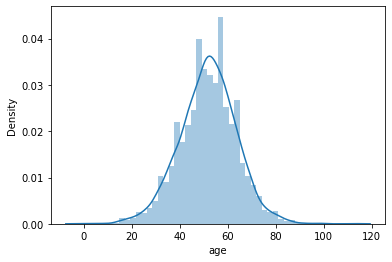

In [2168]:
sns.distplot(df_merged['age'])

In [2169]:
# from numpy import exp
# from numpy.random import randn
# from sklearn.preprocessing import PowerTransformer
# from matplotlib import pyplot

# # generate gaussian data sample
# data = df_merged['age'].values.reshape(-1, 1)

# # histogram of the raw data with a skew
# pyplot.hist(data, bins=25)

# # reshape data to have rows and columns
# data = data.reshape(-1,1)

# # power transform the raw data
# power = PowerTransformer(method='box-cox', standardize=True) 
# data_trans = power.fit_transform(data)
 
# # histogram of the transformed data
# pyplot.hist(data_trans, bins=25) 

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


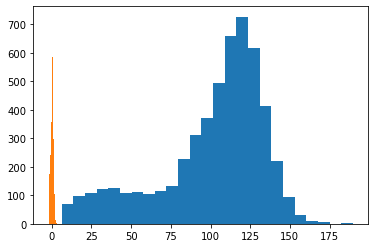

In [2170]:
# Tu je ta transformacia, celkom sa mi zda ze v pohode je

df_merged['mean_glucose'] = transform_data("mean_glucose")




c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


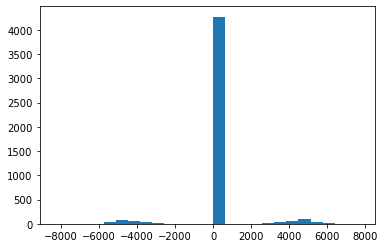

In [2171]:
df_merged['std_glucose'] = transform_data("std_glucose")

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


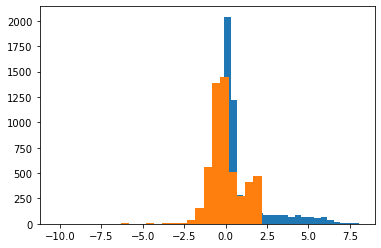

In [2172]:
df_merged['kurtosis_glucose'] = transform_data("kurtosis_glucose")

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


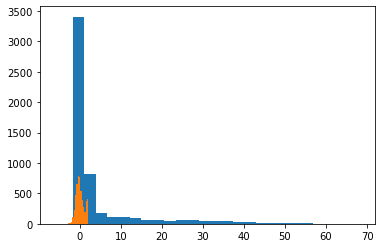

In [2173]:
df_merged['skewness_glucose'] = transform_data("skewness_glucose")

In [2174]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5294 entries, 0 to 5293
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5294 non-null   object 
 1   address           5294 non-null   object 
 2   age               5294 non-null   int64  
 3   sex               5294 non-null   object 
 4   date_of_birth     5294 non-null   object 
 5   race              4912 non-null   object 
 6   marital-status    5280 non-null   object 
 7   occupation        5276 non-null   object 
 8   pregnant          5288 non-null   object 
 9   education-num     5275 non-null   float64
 10  relationship      5271 non-null   object 
 11  capital-gain      5274 non-null   float64
 12  education         5278 non-null   object 
 13  fnlwgt            5282 non-null   float64
 14  class             5278 non-null   float64
 15  income            5273 non-null   object 
 16  native-country    5281 non-null   object 


## KNN

In [2175]:
def knn(data_frame):
    # summarize total missing
    print("Missing: " + str(data_frame.isnull().sum().sum()))

    temp = [col for col in data_frame.columns if data_frame[col].dtypes != 'O']

    # define imputer
    imputer = KNNImputer()

    # fit on the dataset
    imputer.fit(data_frame[temp])

    # transform the dataset
    data_frame[temp] = imputer.transform(data_frame[temp])


    # summarize total missing
    print("Missing: " + str(sum(isnan(Xtrans).flatten())))
    
    return data_frame

In [2176]:
df_merged = knn(df_merged)

Missing: 1565
Missing: 0


In [2177]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5294 entries, 0 to 5293
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5294 non-null   object 
 1   address           5294 non-null   object 
 2   age               5294 non-null   float64
 3   sex               5294 non-null   object 
 4   date_of_birth     5294 non-null   object 
 5   race              4912 non-null   object 
 6   marital-status    5280 non-null   object 
 7   occupation        5276 non-null   object 
 8   pregnant          5288 non-null   object 
 9   education-num     5294 non-null   float64
 10  relationship      5271 non-null   object 
 11  capital-gain      5294 non-null   float64
 12  education         5278 non-null   object 
 13  fnlwgt            5294 non-null   float64
 14  class             5294 non-null   float64
 15  income            5273 non-null   object 
 16  native-country    5281 non-null   object 


In [2178]:
# def remove_outliers(data_frame, column, koeficient):
#     seed(1)
#     data = data_frame[column]

#     # calculate summary statistics
#     data_mean, data_std = mean(data), std(data)
#     print('len=', len(data), 'mean=', data_mean, 'std=', data_std)

#     # define outliers
#     cut_off = data_std * koeficient
#     lower, upper = data_mean - cut_off, data_mean + cut_off 
#     print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

#     # identify outliers
#     outliers = [x for x in data if x < lower or x > upper] 
#     print('Identified outliers: %d' % len(outliers))

#     # remove outliers
#     data = [x for x in data if x >= lower and x <= upper]
# #     print('Non-outlier observations: %d' % len(outliers_removed))
#     print('Non-outlier observations: %d' % len(data))

#     sns.distplot(data)
# #     sns.distplot(outliers_removed)
#     sns.distplot(data)
    
# #     data_frame = data_frame.drop(outliers.index)
#     return data
    
# #     return outliers_removed

In [2179]:
# def remove_outliers(data_frame, column, koeficient):
#     seed(1)
#     data = data_frame[column]

#     # calculate summary statistics
#     data_mean, data_std = mean(data), std(data)
#     print('len=', len(data), 'mean=', data_mean, 'std=', data_std)

#     # define outliers
#     cut_off = data_std * koeficient
#     lower, upper = data_mean - cut_off, data_mean + cut_off 
#     print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

#     # identify outliers
# #     outliers = [x for x in data if x < lower or x > upper] 
#     outliers = data[(data > upper) | (data < lower)]
#     print('Identified outliers: %d' % len(outliers))

#     # remove outliers
#     outliers_removed = [x for x in data if x >= lower and x <= upper]
#     print('Non-outlier observations: %d' % len(outliers_removed))

#     sns.distplot(data)
#     sns.distplot(outliers_removed)
    
#     data_frame = data_frame.drop(outliers.index)
#     return data_frame
    
# #     return outliers_removed

In [2180]:
# def remove_outliers(data_frame, column):
#     a = data_frame[column]
#     lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
#     upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
#     outliers = a[(a > upper) | (a < lower)]
#     data_frame = data_frame.drop(outliers.index)
#     return data_frame

In [2181]:
# def remove_outliers(data_frame, column, koeficient):
#     seed(1)
#     data = data_frame[column]
#     sns.distplot(data)

#     # calculate interquartile range
#     q25, q75 = percentile(data, 20), percentile(data, 80)
#     iqr = q75 - q25
#     print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 

#     # calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off
#     print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

#     # identify outliers
#     outliers = data[(data > upper) | (data < lower)]
#     print('Identified outliers: %d' % len(outliers))

#     # remove outliers
#     outliers_removed = [x for x in data if x >= lower and x <= upper] 
#     print('Non-outlier observations: %d' % len(outliers_removed))

#     sns.distplot(outliers_removed)
    
#     data_frame = data_frame.drop(outliers.index)
#     return data_frame

In [2182]:
# df_merged['age'] = replace_outliers(df_merged, "age")

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


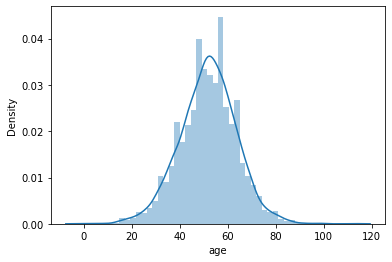

In [2183]:
sns.distplot(df_merged['age'])

In [2184]:
# df_merged = remove_outliers(df_merged, "age", 4)

In [2185]:
print(df_merged['age'].min())

-1.0


 20  mean_glucose      5279 non-null   float64
 21  std_glucose       4751 non-null   float64
 22  kurtosis_glucose  5279 non-null   float64
 23  skewness_glucose  5279 non-null   float64
 24  mean_oxygen       5279 non-null   float64
 25  std_oxygen        5279 non-null   float64
 26  kurtosis_oxygen   5279 non-null   float64
 27  skewness_oxygen   5279 non-null   float64

Percentiles: 25th=-1.893, 75th=1.391, IQR=3.284
cutoff= 4.925989422572741 lower= -6.819019279861717 upper= 6.3169525136655915
Identified outliers: 0
Non-outlier observations: 5294


c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",37.0,Female,1982-02-08,White,single,Other-service,f,9.0,...,0.0,private,0.966745,0.717836,-1.511671,-0.811012,11.642977,41.904978,3.602677,11.954904
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",58.0,Female,1961-05-04,White,single,Other-service,f,9.0,...,0.0,private,-0.203846,-0.076697,0.041720,0.108587,2.816054,16.659173,7.999821,78.263172
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,48.0,Male,1971-02-03,White,married,Handlers-cleaners,f,10.0,...,0.0,private,-0.435726,-0.086575,0.196657,0.876866,1.086957,12.610281,14.133424,224.144386
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",45.0,Male,1973-12-23,White,married,Farming-fishing,f,4.0,...,0.0,self-emp,-0.140183,-0.076483,-0.045471,-0.269040,2.717391,19.675471,8.112776,71.312964
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",56.0,Male,1963-08-22,White,single,Transport-moving,f,10.0,...,0.0,private,0.334621,-0.073175,-0.764412,-1.443532,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60.0,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,-1.884309,3.199175,1.738057,1.624087,103.806020,85.647206,0.095444,-1.358248
5290,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43.0,Male,1976-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,0.156469,-0.077954,-0.076469,-0.372431,1.261706,13.032154,13.294267,202.930061
5291,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50.0,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,2.267486,-0.082553,-1.806359,0.291266,0.795987,9.677674,18.652776,427.256817
5292,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49.0,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,0.396862,-0.085367,-0.066891,0.630773,1.541806,14.173109,12.022914,164.296414


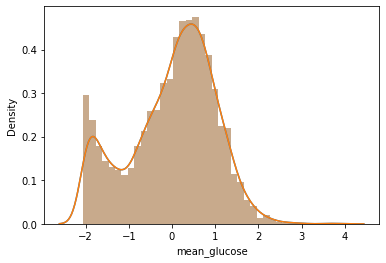

In [2186]:
remove_outliers(df_merged,"mean_glucose", 2)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Percentiles: 25th=-0.458, 75th=0.609, IQR=1.067
cutoff= 1.6002865710211753 lower= -2.057858352225507 upper= 2.2095725038309606
Identified outliers: 433
Non-outlier observations: 4861


,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",37.0,Female,1982-02-08,White,single,Other-service,f,9.0,...,0.0,private,0.966745,0.717836,-1.511671,-0.811012,11.642977,41.904978,3.602677,11.954904
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",58.0,Female,1961-05-04,White,single,Other-service,f,9.0,...,0.0,private,-0.203846,-0.076697,0.041720,0.108587,2.816054,16.659173,7.999821,78.263172
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,48.0,Male,1971-02-03,White,married,Handlers-cleaners,f,10.0,...,0.0,private,-0.435726,-0.086575,0.196657,0.876866,1.086957,12.610281,14.133424,224.144386
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",45.0,Male,1973-12-23,White,married,Farming-fishing,f,4.0,...,0.0,self-emp,-0.140183,-0.076483,-0.045471,-0.269040,2.717391,19.675471,8.112776,71.312964
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",56.0,Male,1963-08-22,White,single,Transport-moving,f,10.0,...,0.0,private,0.334621,-0.073175,-0.764412,-1.443532,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,James Randle,"0757 Robinson Turnpike\r\nNorth Daniel, MD 42950",61.0,Male,1958-05-17,White,married,Farming-fishing,f,9.0,...,1902.0,self-emp,0.872738,-0.083163,-0.453989,0.255092,1.269231,13.465902,12.637769,181.557987
5290,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43.0,Male,1976-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,0.156469,-0.077954,-0.076469,-0.372431,1.261706,13.032154,13.294267,202.930061
5291,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50.0,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,2.267486,-0.082553,-1.806359,0.291266,0.795987,9.677674,18.652776,427.256817
5292,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49.0,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,0.396862,-0.085367,-0.066891,0.630773,1.541806,14.173109,12.022914,164.296414


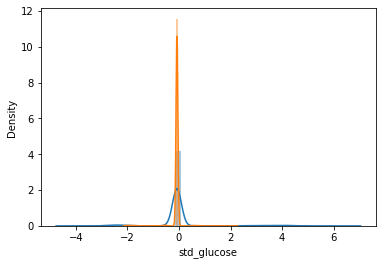

In [2187]:
remove_outliers(df_merged,"std_glucose", 4)

Percentiles: 25th=-1.250, 75th=1.859, IQR=3.110
cutoff= 4.664724803520777 lower= -5.915131519797788 upper= 6.524134622924284
Identified outliers: 6
Non-outlier observations: 5288


c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",37.0,Female,1982-02-08,White,single,Other-service,f,9.0,...,0.0,private,0.966745,0.717836,-1.511671,-0.811012,11.642977,41.904978,3.602677,11.954904
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",58.0,Female,1961-05-04,White,single,Other-service,f,9.0,...,0.0,private,-0.203846,-0.076697,0.041720,0.108587,2.816054,16.659173,7.999821,78.263172
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,48.0,Male,1971-02-03,White,married,Handlers-cleaners,f,10.0,...,0.0,private,-0.435726,-0.086575,0.196657,0.876866,1.086957,12.610281,14.133424,224.144386
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",45.0,Male,1973-12-23,White,married,Farming-fishing,f,4.0,...,0.0,self-emp,-0.140183,-0.076483,-0.045471,-0.269040,2.717391,19.675471,8.112776,71.312964
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",56.0,Male,1963-08-22,White,single,Transport-moving,f,10.0,...,0.0,private,0.334621,-0.073175,-0.764412,-1.443532,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60.0,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,-1.884309,3.199175,1.738057,1.624087,103.806020,85.647206,0.095444,-1.358248
5290,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43.0,Male,1976-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,0.156469,-0.077954,-0.076469,-0.372431,1.261706,13.032154,13.294267,202.930061
5291,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50.0,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,2.267486,-0.082553,-1.806359,0.291266,0.795987,9.677674,18.652776,427.256817
5292,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49.0,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,0.396862,-0.085367,-0.066891,0.630773,1.541806,14.173109,12.022914,164.296414


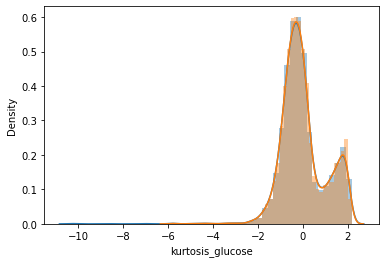

In [2188]:
remove_outliers(df_merged,"kurtosis_glucose", 3)

Percentiles: 25th=-1.429, 75th=1.779, IQR=3.208
cutoff= 4.8116840142247375 lower= -6.240700983941011 upper= 6.590456387324956
Identified outliers: 0
Non-outlier observations: 5294


c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",37.0,Female,1982-02-08,White,single,Other-service,f,9.0,...,0.0,private,0.966745,0.717836,-1.511671,-0.811012,11.642977,41.904978,3.602677,11.954904
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",58.0,Female,1961-05-04,White,single,Other-service,f,9.0,...,0.0,private,-0.203846,-0.076697,0.041720,0.108587,2.816054,16.659173,7.999821,78.263172
2,Aaron Gann,59685 Thomas Extension Apt. 142\r\nFieldsborou...,48.0,Male,1971-02-03,White,married,Handlers-cleaners,f,10.0,...,0.0,private,-0.435726,-0.086575,0.196657,0.876866,1.086957,12.610281,14.133424,224.144386
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen,...",45.0,Male,1973-12-23,White,married,Farming-fishing,f,4.0,...,0.0,self-emp,-0.140183,-0.076483,-0.045471,-0.269040,2.717391,19.675471,8.112776,71.312964
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",56.0,Male,1963-08-22,White,single,Transport-moving,f,10.0,...,0.0,private,0.334621,-0.073175,-0.764412,-1.443532,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60.0,Male,1959-09-21,White,married,Prof-specialty,f,15.0,...,0.0,private,-1.884309,3.199175,1.738057,1.624087,103.806020,85.647206,0.095444,-1.358248
5290,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43.0,Male,1976-09-04,White,married,Transport-moving,f,9.0,...,0.0,private,0.156469,-0.077954,-0.076469,-0.372431,1.261706,13.032154,13.294267,202.930061
5291,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50.0,Male,1968-12-02,White,married,Prof-specialty,f,13.0,...,0.0,government,2.267486,-0.082553,-1.806359,0.291266,0.795987,9.677674,18.652776,427.256817
5292,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49.0,Female,1970-04-05,White,single,Sales,f,9.0,...,0.0,private,0.396862,-0.085367,-0.066891,0.630773,1.541806,14.173109,12.022914,164.296414


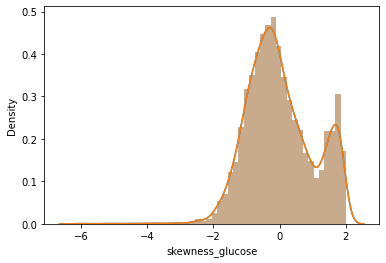

In [2189]:
remove_outliers(df_merged,"skewness_glucose", 3)

In [2190]:
df_merged['std_glucose'].isnull().sum()

0

In [2191]:
df_merged = fill_median(df_merged)

In [2192]:
df_merged = fill_mode(df_merged)

In [2193]:
df_merged = get_zip(df_merged,'address')

In [2194]:
df_merged = get_mode(df_merged, "race")

In [2195]:
df_merged = df_merged.drop('name', 1)

In [2196]:
df_merged = calculate_age(df_merged, 'date_of_birth', 'age')

In [2197]:
df_merged = df_merged.drop('date_of_birth', 1)

In [2198]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           5292 non-null   int32  
 1   age               5292 non-null   float64
 2   sex               5292 non-null   object 
 3   race              5292 non-null   object 
 4   marital-status    5292 non-null   object 
 5   occupation        5292 non-null   object 
 6   pregnant          5292 non-null   object 
 7   education-num     5292 non-null   float64
 8   relationship      5292 non-null   object 
 9   capital-gain      5292 non-null   float64
 10  education         5292 non-null   object 
 11  fnlwgt            5292 non-null   float64
 12  class             5292 non-null   float64
 13  income            5292 non-null   object 
 14  native-country    5292 non-null   object 
 15  hours-per-week    5292 non-null   float64
 16  capital-loss      5292 non-null   float64


In [2199]:
df_merged

,address,age,sex,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,83114,37.0,Female,White,single,Other-service,f,9.0,Own-child,0.0,...,0.0,private,0.966745,0.717836,-1.511671,-0.811012,11.642977,41.904978,3.602677,11.954904
1,59124,58.0,Female,White,single,Other-service,f,9.0,Own-child,0.0,...,0.0,private,-0.203846,-0.076697,0.041720,0.108587,2.816054,16.659173,7.999821,78.263172
2,17996,48.0,Male,White,married,Handlers-cleaners,f,10.0,Husband,0.0,...,0.0,private,-0.435726,-0.086575,0.196657,0.876866,1.086957,12.610281,14.133424,224.144386
3,31095,45.0,Male,White,married,Farming-fishing,f,4.0,Husband,0.0,...,0.0,self-emp,-0.140183,-0.076483,-0.045471,-0.269040,2.717391,19.675471,8.112776,71.312964
4,73176,56.0,Male,White,single,Transport-moving,f,10.0,Not-in-family,0.0,...,0.0,private,0.334621,-0.073175,-0.764412,-1.443532,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,81156,60.0,Male,White,married,Prof-specialty,f,15.0,Husband,0.0,...,0.0,private,-1.884309,3.199175,1.738057,1.624087,103.806020,85.647206,0.095444,-1.358248
5288,72779,43.0,Male,White,married,Transport-moving,f,9.0,Husband,0.0,...,0.0,private,0.156469,-0.077954,-0.076469,-0.372431,1.261706,13.032154,13.294267,202.930061
5289,73214,50.0,Male,White,married,Prof-specialty,f,13.0,Husband,5178.0,...,0.0,government,2.267486,-0.082553,-1.806359,0.291266,0.795987,9.677674,18.652776,427.256817
5290,19977,49.0,Female,White,single,Sales,f,9.0,Unmarried,0.0,...,0.0,private,0.396862,-0.085367,-0.066891,0.630773,1.541806,14.173109,12.022914,164.296414


In [2200]:
df_merged = encode_objects(df_merged)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [2201]:
df_merged

,address,age,sex,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,83114,37.0,1,1,1,1,0,9.0,1,0.0,...,0.0,1,0.966745,0.717836,-1.511671,-0.811012,11.642977,41.904978,3.602677,11.954904
1,59124,58.0,1,1,1,1,0,9.0,1,0.0,...,0.0,1,-0.203846,-0.076697,0.041720,0.108587,2.816054,16.659173,7.999821,78.263172
2,17996,48.0,0,1,2,2,0,10.0,2,0.0,...,0.0,1,-0.435726,-0.086575,0.196657,0.876866,1.086957,12.610281,14.133424,224.144386
3,31095,45.0,0,1,2,3,0,4.0,2,0.0,...,0.0,2,-0.140183,-0.076483,-0.045471,-0.269040,2.717391,19.675471,8.112776,71.312964
4,73176,56.0,0,1,1,4,0,10.0,3,0.0,...,0.0,1,0.334621,-0.073175,-0.764412,-1.443532,1.227425,12.031249,14.087309,234.473686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,81156,60.0,0,1,2,11,0,15.0,2,0.0,...,0.0,1,-1.884309,3.199175,1.738057,1.624087,103.806020,85.647206,0.095444,-1.358248
5288,72779,43.0,0,1,2,4,0,9.0,2,0.0,...,0.0,1,0.156469,-0.077954,-0.076469,-0.372431,1.261706,13.032154,13.294267,202.930061
5289,73214,50.0,0,1,2,11,0,13.0,2,5178.0,...,0.0,3,2.267486,-0.082553,-1.806359,0.291266,0.795987,9.677674,18.652776,427.256817
5290,19977,49.0,1,1,1,7,0,9.0,6,0.0,...,0.0,1,0.396862,-0.085367,-0.066891,0.630773,1.541806,14.173109,12.022914,164.296414


In [2202]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           5292 non-null   int32  
 1   age               5292 non-null   float64
 2   sex               5292 non-null   int64  
 3   race              5292 non-null   int32  
 4   marital-status    5292 non-null   int32  
 5   occupation        5292 non-null   int32  
 6   pregnant          5292 non-null   int32  
 7   education-num     5292 non-null   float64
 8   relationship      5292 non-null   int32  
 9   capital-gain      5292 non-null   float64
 10  education         5292 non-null   int32  
 11  fnlwgt            5292 non-null   float64
 12  class             5292 non-null   float64
 13  income            5292 non-null   int64  
 14  native-country    5292 non-null   int32  
 15  hours-per-week    5292 non-null   float64
 16  capital-loss      5292 non-null   float64
